___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





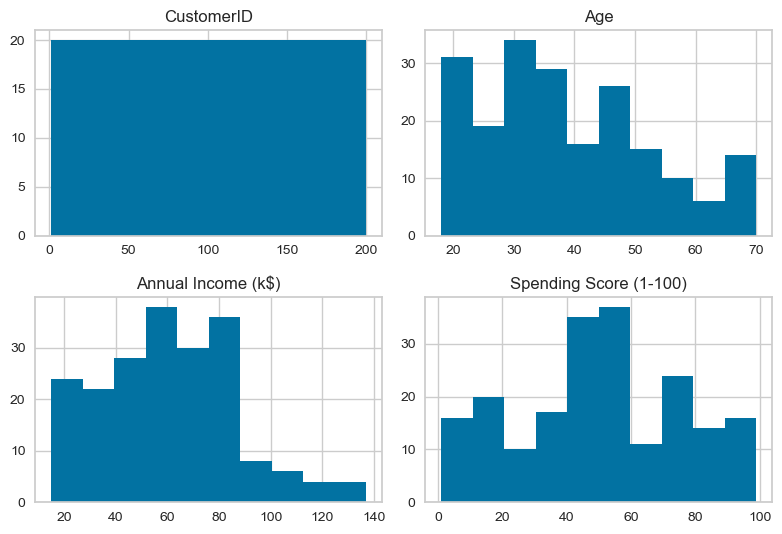

In [7]:
#frequency distribution visualization
df.hist()
plt.tight_layout();

Spending score is normally distributed while annual income and age are right skewed.

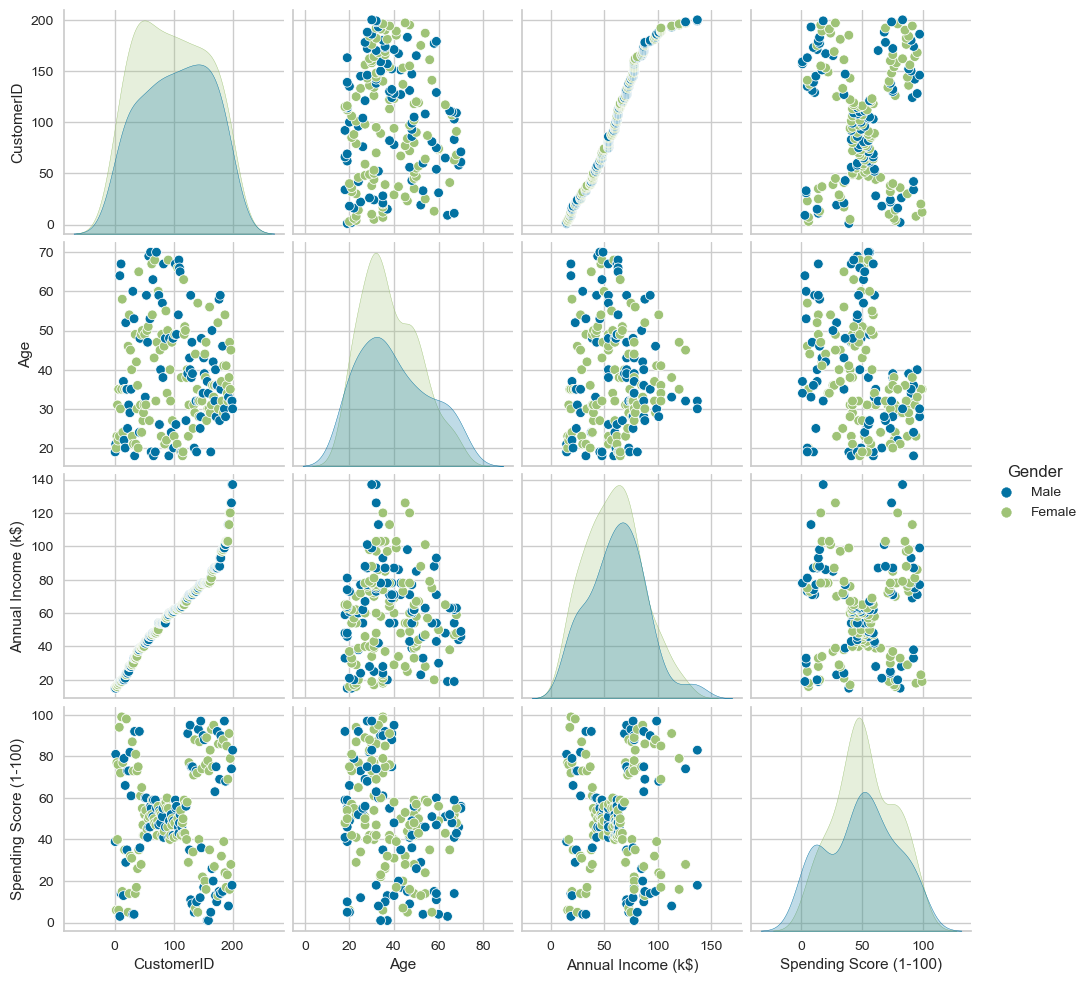

In [8]:
sns.pairplot(df, hue = 'Gender');

Data could be segmented into five clusters.

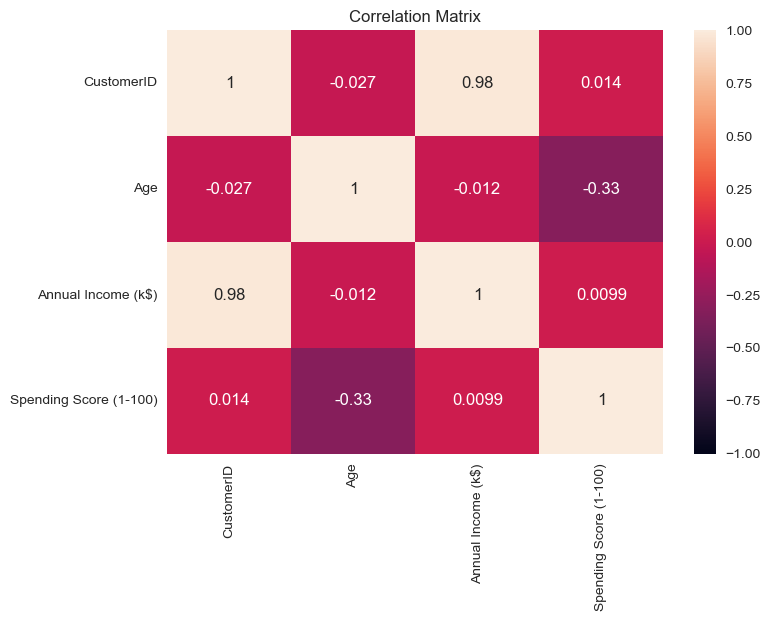

In [9]:
sns.heatmap(df.corr(numeric_only = True),annot=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show();

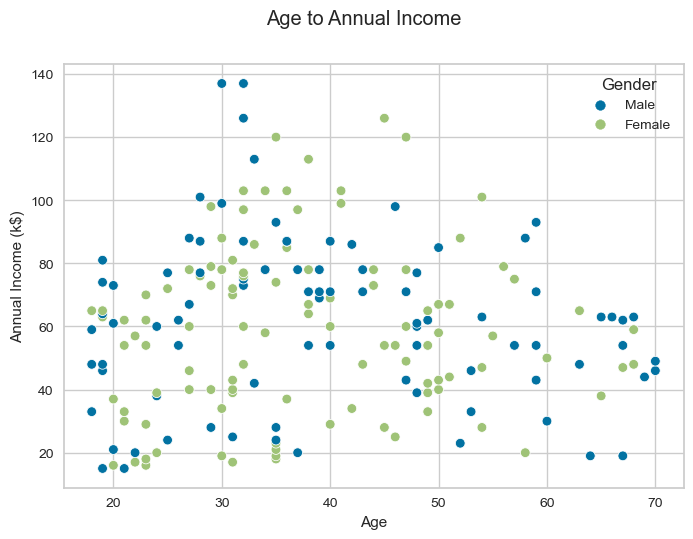

In [10]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = 'Gender')
plt.suptitle('Age to Annual Income');

No clear clusters.

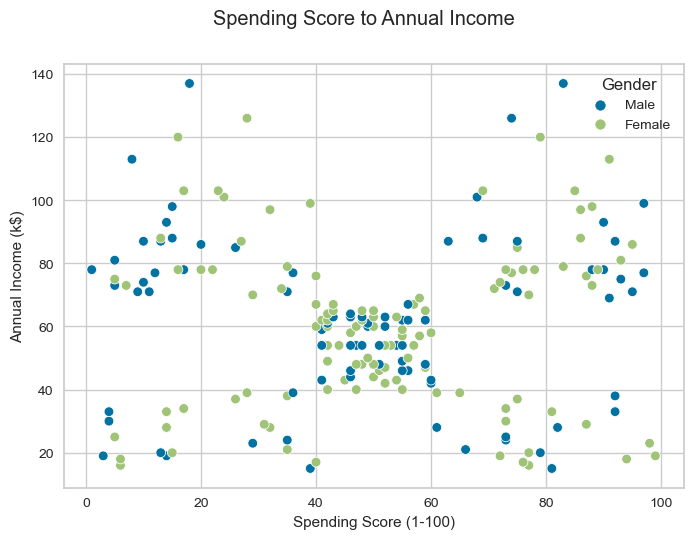

In [11]:
sns.scatterplot(data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Gender')
plt.suptitle('Spending Score to Annual Income');

Clusters are clearer.

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [12]:
X_as = df[['Age', 'Spending Score (1-100)']]

In [13]:
def optimal_num_cluters(data, first = 2, last = 10, kmeans = True):
    
    K = range(first, last)
    #kmeans clustering and elbow method
    if kmeans == True:
        ssd = []
        #silouhette scores
        for k in K:
            model = KMeans(n_clusters =k, random_state=42)
            model.fit(data)
            print(f'Silhouette Score for {k} kmeans clusters: {silhouette_score(data, model.labels_)}')
            
        model = KMeans()
        #elbow (distortion score) method  
        visualizer1 = KElbowVisualizer(model, k=k, timings= False)
        visualizer1.fit(data)      
        visualizer1.show()
        visualizer1.elbow_value_
        #the calinski_harabasz score computes the ratio of dispersion between and within clusters.
        visualizer2 = KElbowVisualizer(model, k=k, metric='calinski_harabasz', timings= False)
        visualizer2.fit(data)      
        visualizer2.show()
    #Agglomerative clustering and dendogram   
    else: 
        #silouhette scores
        for k in K:
            model = AgglomerativeClustering(n_clusters = k)
            model.fit_predict(data)
            print(f'Silhouette Score for {k} agglomerative clusters: {silhouette_score(data, model.labels_)}')
        #dendogram plot
        hc = linkage(y = data, method = "ward")
        dendrogram(hc, leaf_font_size = 10)
        plt.xlabel("Observations")
        plt.ylabel("Distance")
        
        plt.show()
        #calinski_harabasz score
        model = AgglomerativeClustering()
        visualizer = KElbowVisualizer(model, k=k, metric='calinski_harabasz', timings= False)
        visualizer.fit(data)      
        visualizer.show()

#### *ii. Determine optimal number of clusters*

Silhouette Score for 2 kmeans clusters: 0.4692341232501655
Silhouette Score for 3 kmeans clusters: 0.45300127016521263
Silhouette Score for 4 kmeans clusters: 0.49973941540141753
Silhouette Score for 5 kmeans clusters: 0.43350225495428363
Silhouette Score for 6 kmeans clusters: 0.4376965763059772
Silhouette Score for 7 kmeans clusters: 0.42313509747504796
Silhouette Score for 8 kmeans clusters: 0.43215030177487107
Silhouette Score for 9 kmeans clusters: 0.41485342159923116


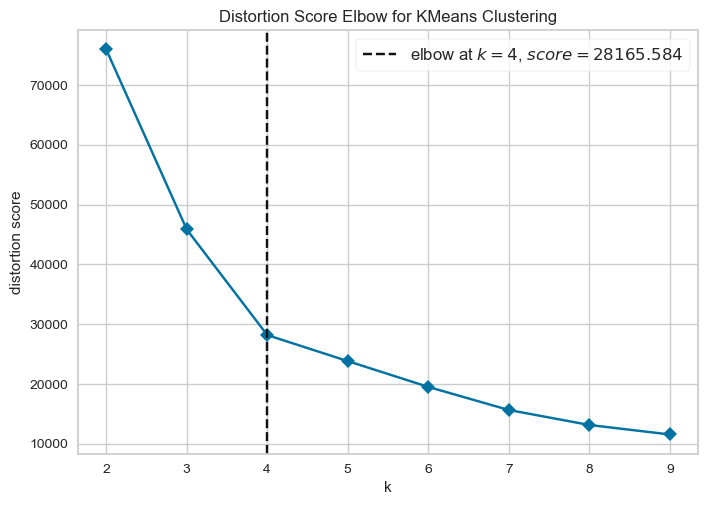

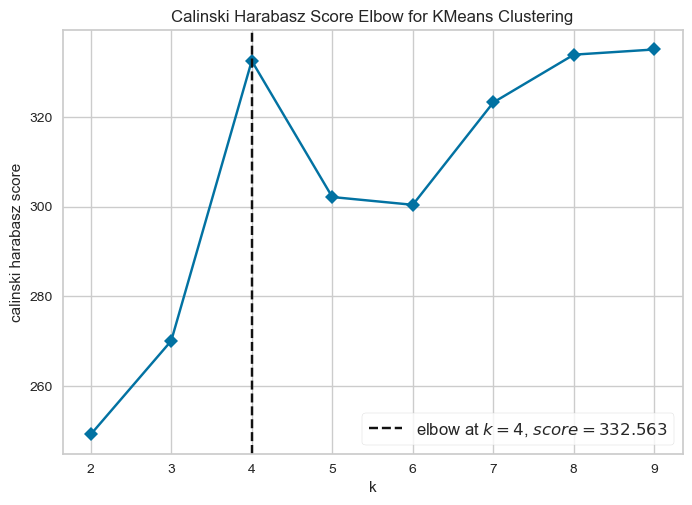

In [14]:
optimal_num_cluters(X_as)

Silhouette, calinski_harabasz, and elbow method for distortion score suggest four clusters.

### Why silhouette_score is negative?

![image.png](attachment:image.png)

negative - >  clusters are not compact.

#### *iii. Apply K Means*

In [15]:
k_as = KMeans(n_clusters = 4)
k_as.fit(X_as)

KMeans(n_clusters=4)

In [16]:
silhouette_score(X_as, k_as.labels_)

0.49973941540141753

Clusters are not that strong.

#### *iv. Visualizing and Labeling All the Clusters*

In [17]:
def vis_sil(model, data):
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(data)    
    visualizer.poof(); 

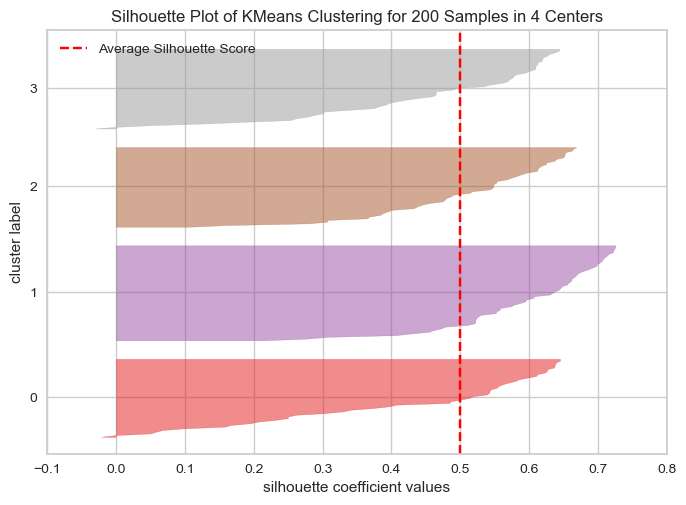

In [18]:
#visualizing silhouette_score    
vis_sil(k_as, X_as)

Decent but could perform better with different fetures.

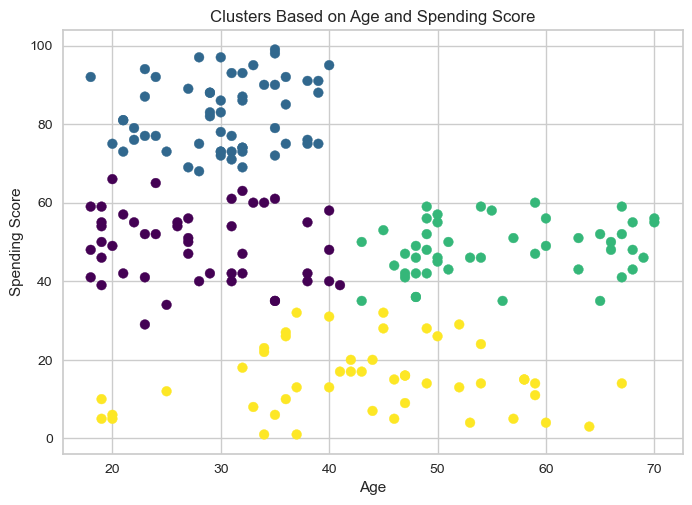

In [19]:
#visualizing clusters
plt.scatter(X_as['Age'], X_as['Spending Score (1-100)'],
            c = k_as.labels_, cmap="viridis")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Age and Spending Score');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
X_is = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#### *ii. Determine optimal number of clusters*

Silhouette Score for 2 kmeans clusters: 0.2968969162503008
Silhouette Score for 3 kmeans clusters: 0.46761358158775435
Silhouette Score for 4 kmeans clusters: 0.4931963109249047
Silhouette Score for 5 kmeans clusters: 0.553931997444648
Silhouette Score for 6 kmeans clusters: 0.53976103063432
Silhouette Score for 7 kmeans clusters: 0.5264283703685728
Silhouette Score for 8 kmeans clusters: 0.45827056882053113
Silhouette Score for 9 kmeans clusters: 0.4553729779390266


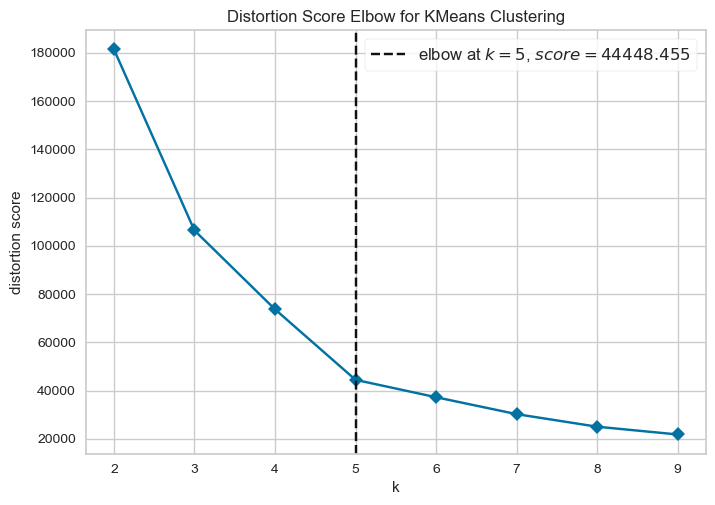

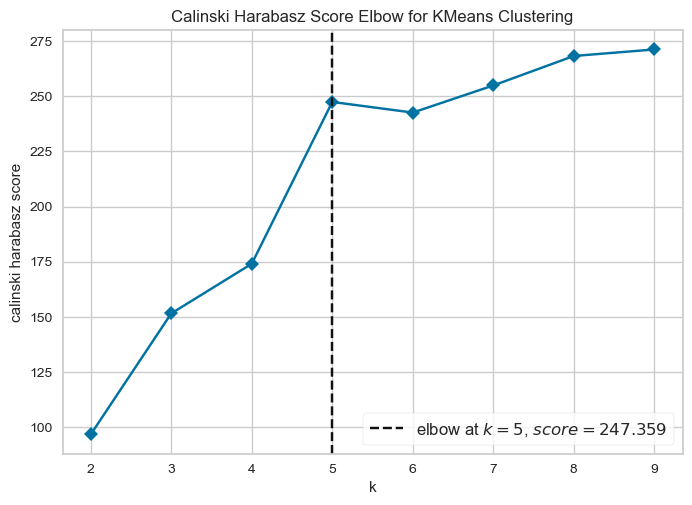

In [21]:
optimal_num_cluters(X_is)

We can easily say that the optimal number of clusters is five.

#### *iii. Apply K Means*

In [22]:
k_is = KMeans(n_clusters = 5)
k_is.fit(X_is)

KMeans(n_clusters=5)

In [23]:
silhouette_score(X_is, k_is.labels_)

0.553931997444648

#### *iv. Visualizing and Labeling All the Clusters*

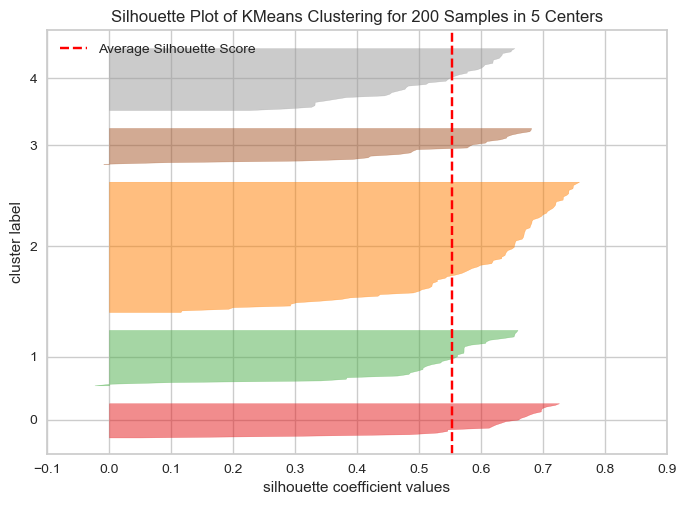

In [24]:
vis_sil(k_is, X_is)

Better than the previously selected features.

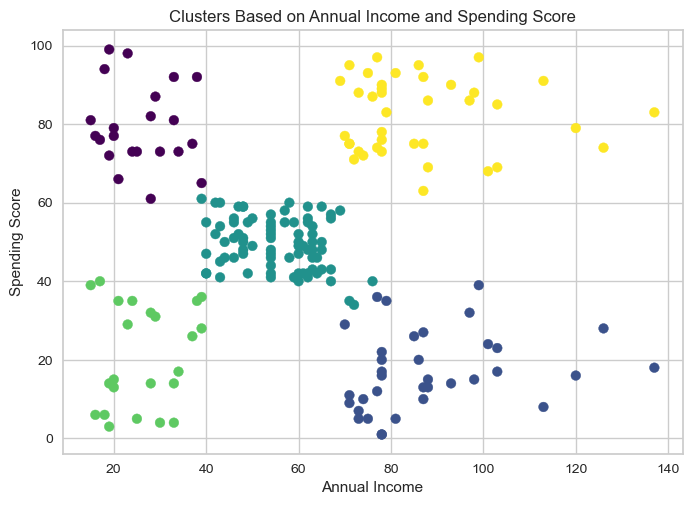

In [25]:
plt.scatter(X_is['Annual Income (k$)'], X_is['Spending Score (1-100)'],
            c = k_is.labels_, cmap="viridis")

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Annual Income and Spending Score');

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

Silhouette Score for 2 agglomerative clusters: 0.4549465643222241
Silhouette Score for 3 agglomerative clusters: 0.4411791686353356
Silhouette Score for 4 agglomerative clusters: 0.4602496389565028
Silhouette Score for 5 agglomerative clusters: 0.40374071753059787
Silhouette Score for 6 agglomerative clusters: 0.4125958704145705
Silhouette Score for 7 agglomerative clusters: 0.4158977524079244
Silhouette Score for 8 agglomerative clusters: 0.3883688959732531
Silhouette Score for 9 agglomerative clusters: 0.3948151533262091


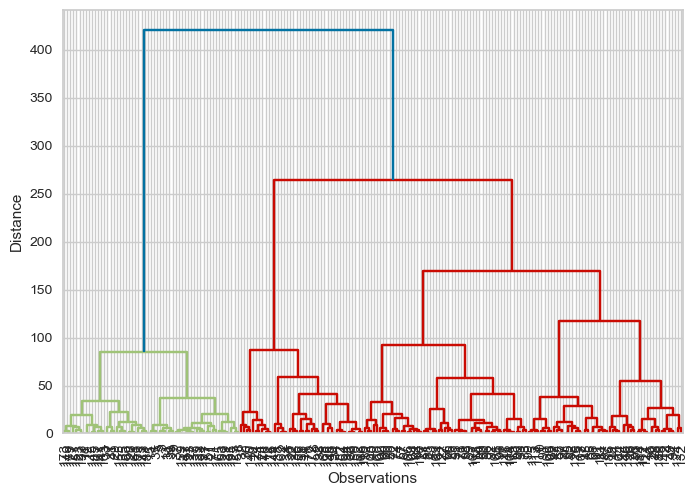

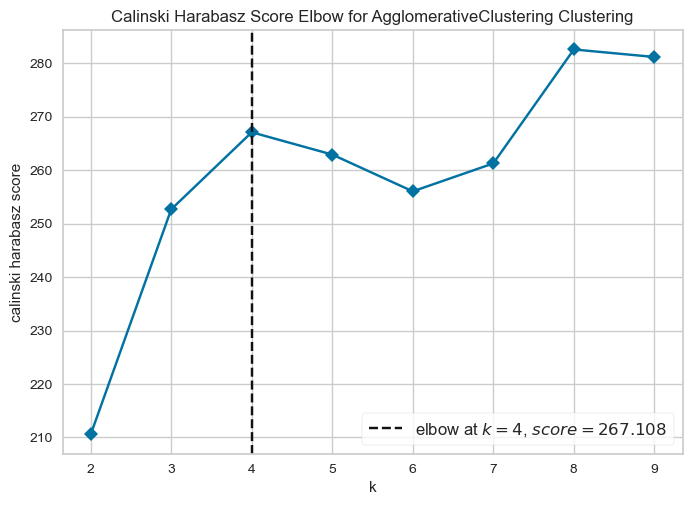

In [26]:
optimal_num_cluters(X_as, kmeans = False)

Four clusters is the optimal K.

## Clustering based on Annual Income and Spending Score- x2

Silhouette Score for 2 agglomerative clusters: 0.36706444723912895
Silhouette Score for 3 agglomerative clusters: 0.4618340266628975
Silhouette Score for 4 agglomerative clusters: 0.4916598193892782
Silhouette Score for 5 agglomerative clusters: 0.5529945955148897
Silhouette Score for 6 agglomerative clusters: 0.5380208285578872
Silhouette Score for 7 agglomerative clusters: 0.519904611908887
Silhouette Score for 8 agglomerative clusters: 0.4326286245782246
Silhouette Score for 9 agglomerative clusters: 0.43892545672004507


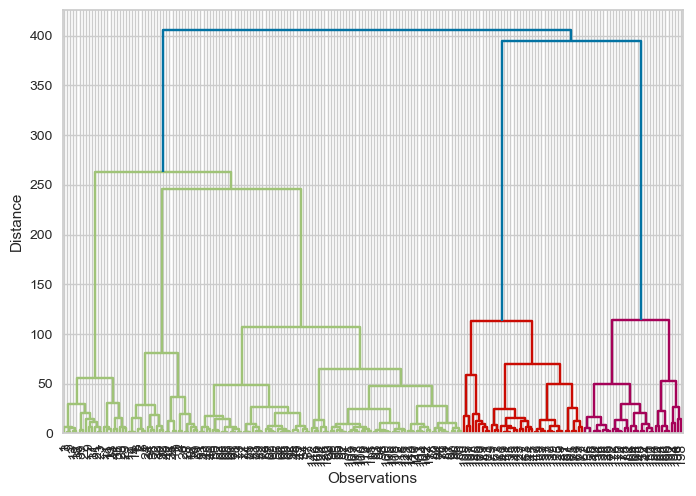

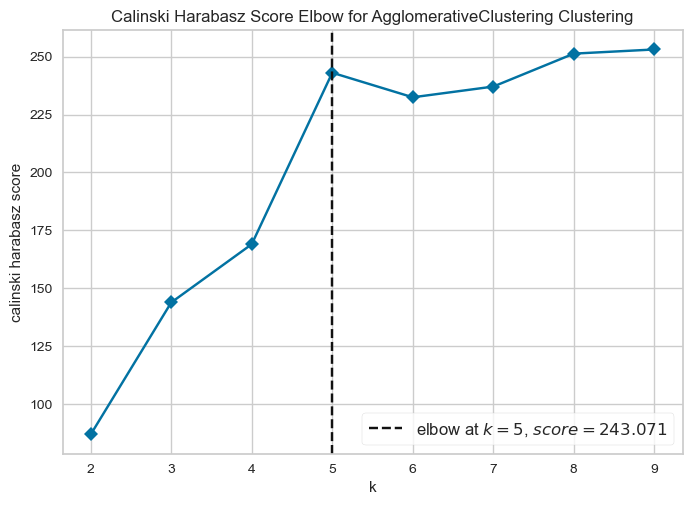

In [27]:
optimal_num_cluters(X_is, kmeans = False)

Five clusters is the optimal.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [28]:
a_clustering_as = AgglomerativeClustering(n_clusters=4)
a_clustering_as = a_clustering_as.fit_predict(X_as)

#### Annual Income and Spending Score- x2

In [29]:
a_clustering_is = AgglomerativeClustering(n_clusters=5)
a_clustering_is = a_clustering_is.fit_predict(X_is)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

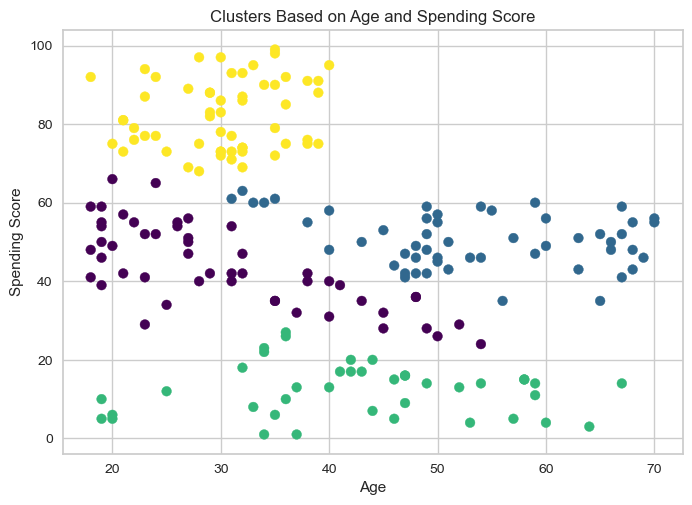

In [30]:
plt.scatter(X_as['Age'], X_as['Spending Score (1-100)'],
            c = a_clustering_as, cmap="viridis")

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Age and Spending Score');

#### Annual Income and Spending Score- x2

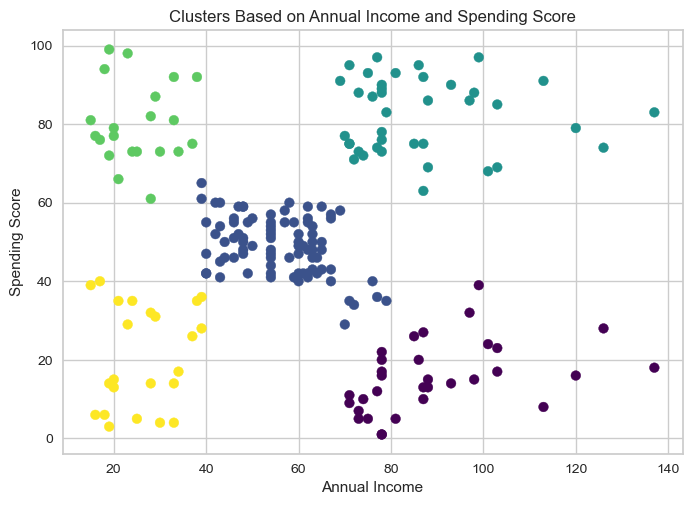

In [31]:
plt.scatter(X_is['Annual Income (k$)'], X_is['Spending Score (1-100)'],
            c = a_clustering_is, cmap="viridis")

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Annual Income and Spending Score');

#### Interpretation based on Age and Spending Score- x1

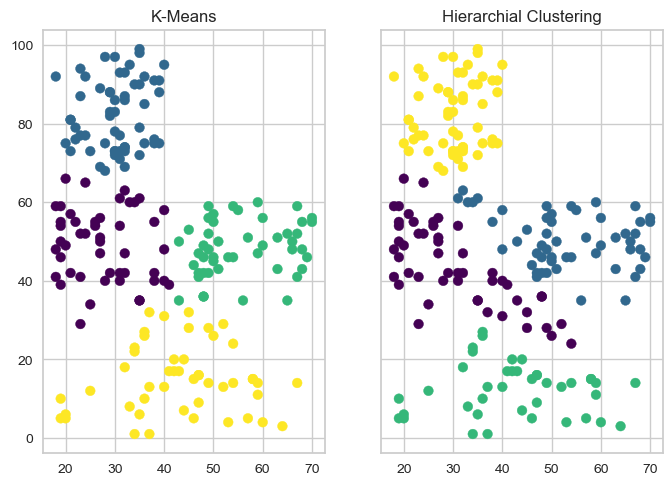

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X_as["Age"], X_as["Spending Score (1-100)"], c = k_as.labels_, cmap="viridis")
ax1.set_title('K-Means')

ax2.scatter(X_as["Age"], X_as["Spending Score (1-100)"], c = a_clustering_as, cmap="viridis")
ax2.set_title('Hierarchial Clustering')
plt.show();

K-Means provides better clustering.

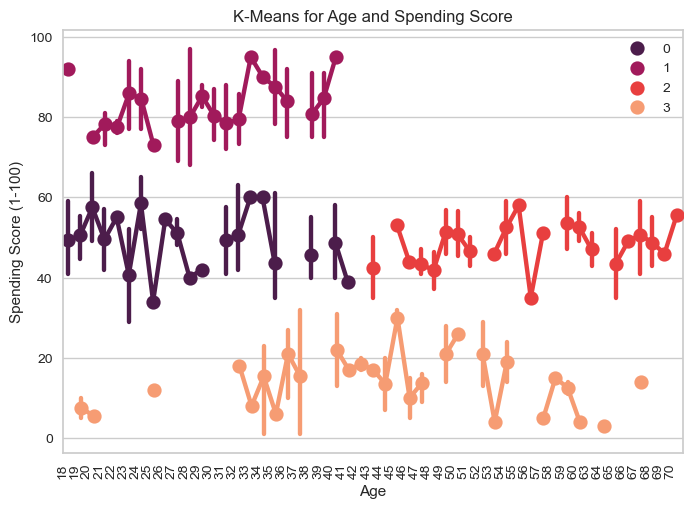

In [33]:
sns.pointplot(
    data=X_as, x="Age", y="Spending Score (1-100)", hue=k_as.labels_,palette = 'rocket', dodge=True)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light')
plt.title('K-Means for Age and Spending Score')
plt.show()

In general people aging between 18 and 40 are scattered across various scores from having lowest to highest spending score in the dataset.

Specifically, there are four groups of customers based on **demographic segmentation**:

- 0 : Teens to customers around the age of 42 who have an average spending score. (**middle age to under with average score**)
- 1 : Teens to middle age customers who have a high spending score. (**middle age to under with high score**)
- 2 : Customers ranging from 44 to 70 who have an average spending score.(**middle age to above with average score**)
- 3 : Cutomers from all ages (but mostly 31 to 70) who have a low spending score. (**all ages with low score**)

In [34]:
#making genders legend
levels, categories = pd.factorize(df['Gender'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

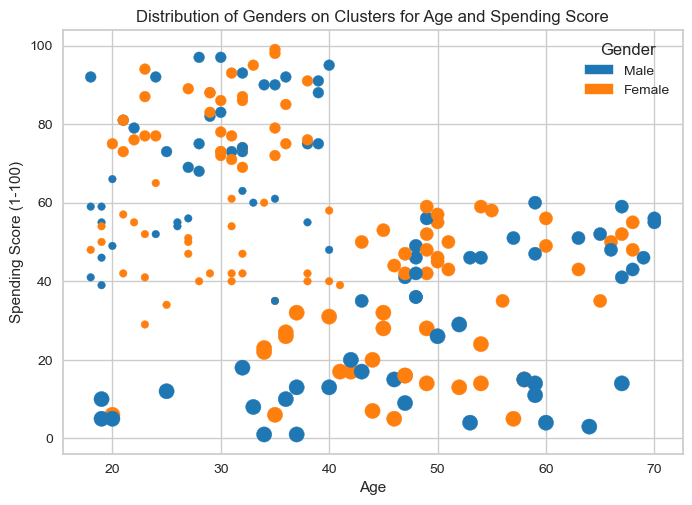

In [35]:

plt.scatter(df["Age"], df["Spending Score (1-100)"], c=colors, s = (k_as.labels_ + 1 )* 30)
plt.gca().set(xlabel='Age', ylabel='Spending Score (1-100)',
              title='Distribution of Genders on Clusters for Age and Spending Score')
plt.legend(handles=handles, title='Gender');

The size of markers represents the clusters from 0 to 3.

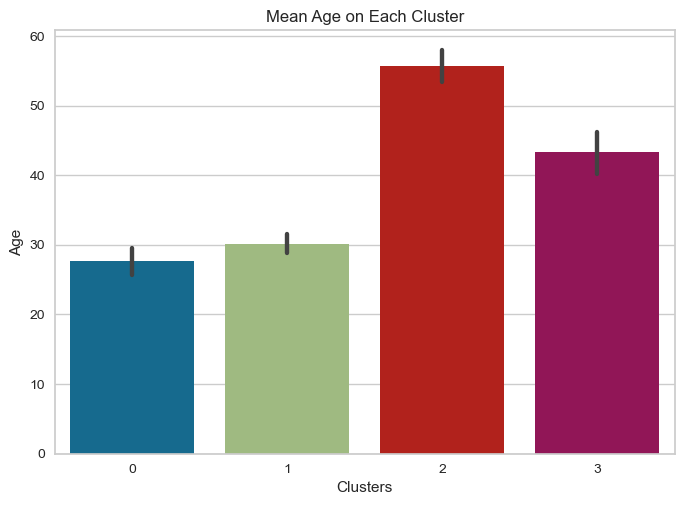

In [36]:
#plot ages
sns.barplot(x = k_as.labels_, y = df['Age'])
plt.xlabel('Clusters')
plt.title('Mean Age on Each Cluster');

### Conclusion

**cluster 0**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.  

**cluster 2** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 3**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

#### Interpretation based on Annual Income and Spending Score- x2

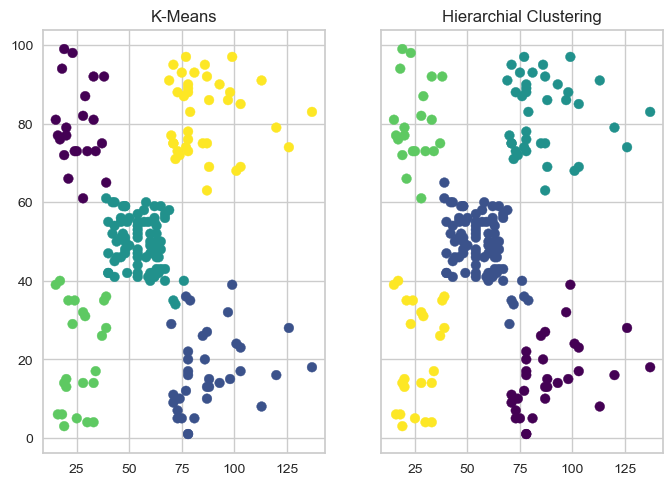

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X_is["Annual Income (k$)"], X_is["Spending Score (1-100)"], c = k_is.labels_, cmap="viridis")
ax1.set_title('K-Means')

ax2.scatter(X_is["Annual Income (k$)"], X_is["Spending Score (1-100)"], c = a_clustering_is, cmap="viridis")
ax2.set_title('Hierarchial Clustering')
plt.show();

Both are good clusters but will visualize K-means.

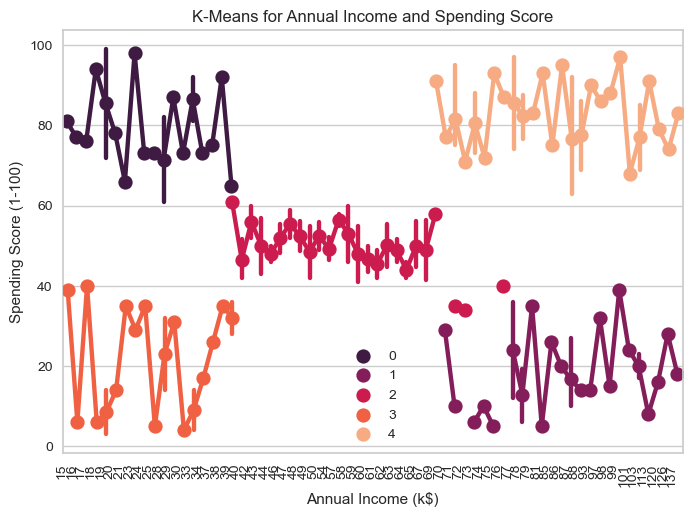

In [38]:
sns.pointplot(data=X_is, x="Annual Income (k$)", y="Spending Score (1-100)", hue=k_is.labels_,
    palette = 'rocket', dodge=True)
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')
plt.title('K-Means for Annual Income and Spending Score')
plt.show()

We can divide mall customers into five groups based on their **demographic segmentation**:

-  0 : Low annual income and high spending score. (**low budget high spending**)
-  1 : High annual income and low spending score. (**high budget low spending**)
-  2 : Average to slightly above average annual income and average spending score. (**average budget and spending**)
-  3 : Low annual income and low spending score. (**low budget and spending**)
-  4 : High annual income and high spending score. (**high budget and spending**)

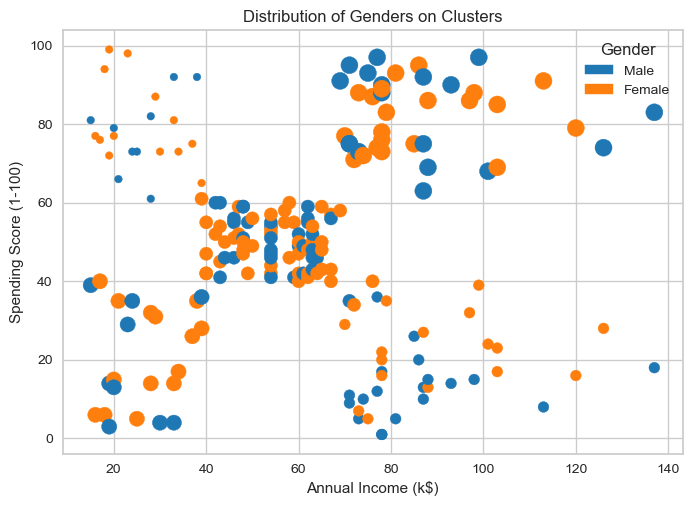

In [39]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = colors,
            s = (k_is.labels_ + 1 )* 30)
plt.gca().set(xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)',
              title='Distribution of Genders on Clusters')
plt.legend(handles=handles, title='Gender');


The size of markers represents the clusters from 0 to 4.

In [40]:
#segmenting data based on gender
df['labels kmeans'] = k_is.labels_

X_is_females = df.loc[df['Gender'] == 'Female']
X_is_males = df.loc[df['Gender'] == 'Male']

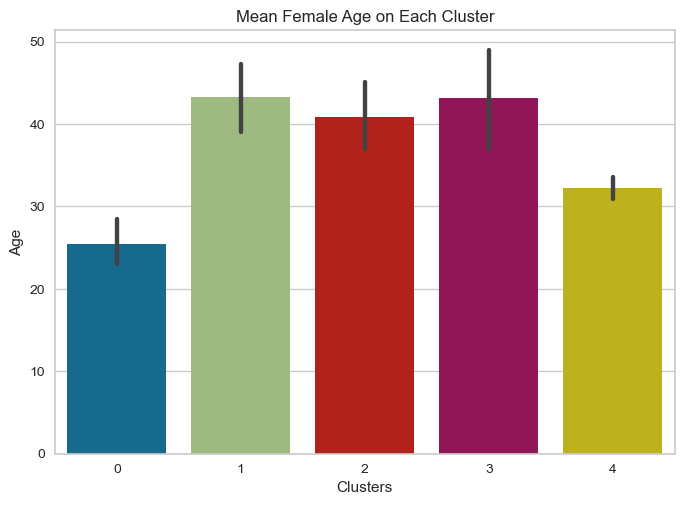

In [41]:
sns.barplot(x = X_is_females['labels kmeans'], y = X_is_females['Age'])
plt.xlabel('Clusters')
plt.title('Mean Female Age on Each Cluster');

## Conclusion

### Female

**cluster 0**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.

**cluster 2** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 3** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.   

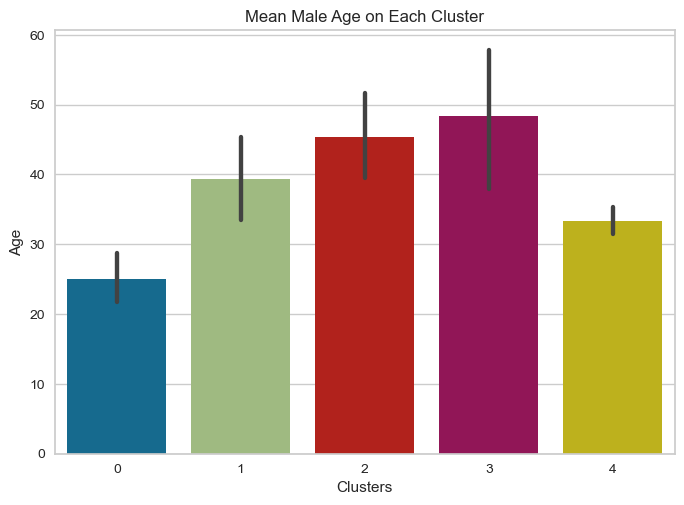

In [42]:
sns.barplot(x = X_is_males['labels kmeans'], y = X_is_males['Age'])
plt.xlabel('Clusters')
plt.title('Mean Male Age on Each Cluster');

### Male

**cluster 0**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 3** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

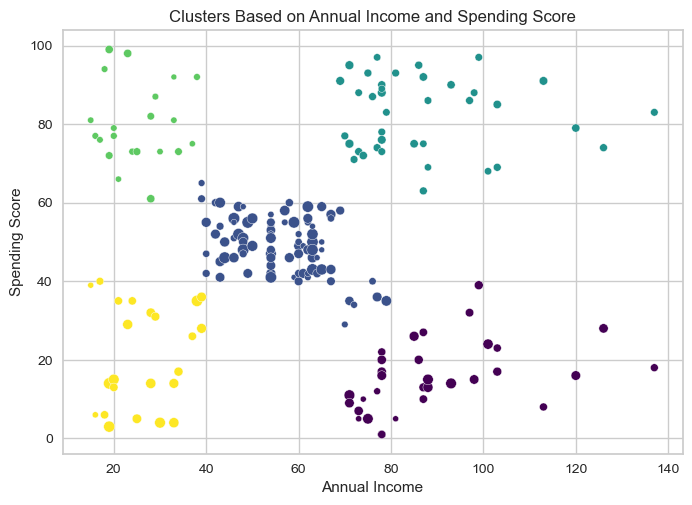

In [43]:
plt.scatter(X_is['Annual Income (k$)'], X_is['Spending Score (1-100)'],
            c = a_clustering_is, edgecolors = 'white', s = df['Age'], cmap="viridis")

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Annual Income and Spending Score');

The size of the marker specifies the age.

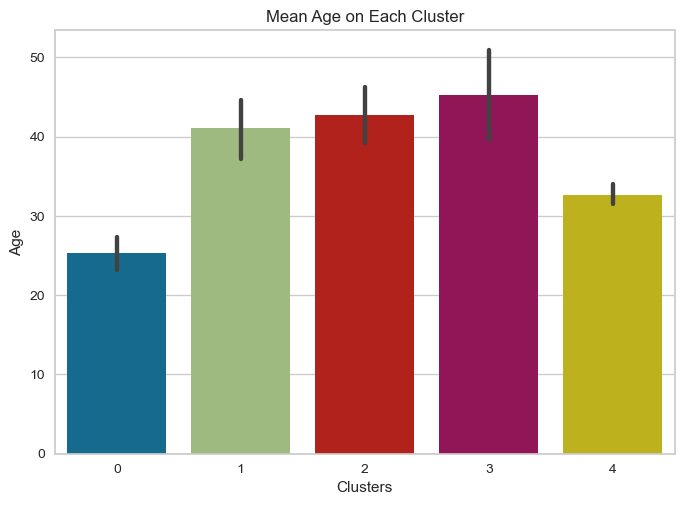

In [44]:
sns.barplot(x = k_is.labels_, y = df['Age'])
plt.xlabel('Clusters')
plt.title('Mean Age on Each Cluster');

**cluster 0**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 1**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

**cluster 2** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 3** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 4**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

### References 


- https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

- https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp#:~:text=Recency%2C%20frequency%2C%20monetary%20value%20%28RFM%29%20is%20a%20marketing,based%20on%20the%20nature%20of%20their%20spending%20habits.

- https://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___